# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Read the dataset

In [2]:
train_data = pd.read_csv('Train.csv')
train_data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
train_data.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

# Convert Datetime to datetime format

In [4]:
import datetime as dt
train_data['Datetime'] =  pd.to_datetime(train_data['Datetime'])
# , format='%d-%m-%Y %H:%M'

In [5]:
train_data.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


# Check for nulls

In [6]:
train_data.isnull().sum()

ID          0
Datetime    0
Count       0
dtype: int64

#### We will only be working with the datetime and count dataset. In addition, the datetime column has to be set as the index

In [7]:
df = train_data[['Datetime', 'Count']]
df.set_index(df.Datetime, inplace=True)

In [8]:
df.drop('Datetime', axis=1, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
df.rename(columns={'Count': 'Traffic_Count'}, inplace=True)
df.head()

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Traffic_Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [10]:
df.index

DatetimeIndex(['2012-08-25 00:00:00', '2012-08-25 01:00:00',
               '2012-08-25 02:00:00', '2012-08-25 03:00:00',
               '2012-08-25 04:00:00', '2012-08-25 05:00:00',
               '2012-08-25 06:00:00', '2012-08-25 07:00:00',
               '2012-08-25 08:00:00', '2012-08-25 09:00:00',
               ...
               '2014-09-25 14:00:00', '2014-09-25 15:00:00',
               '2014-09-25 16:00:00', '2014-09-25 17:00:00',
               '2014-09-25 18:00:00', '2014-09-25 19:00:00',
               '2014-09-25 20:00:00', '2014-09-25 21:00:00',
               '2014-09-25 22:00:00', '2014-09-25 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=18288, freq=None)

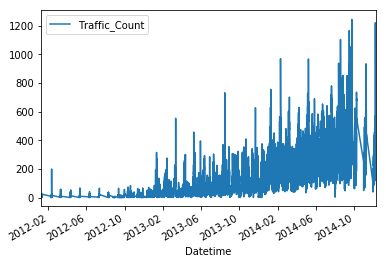

In [11]:
df.plot()

# Resampling the data in monthly basis

In [12]:
monthly_data = df.resample('M').sum()

In [13]:
monthly_data

,Traffic_Count
Datetime,
2012-01-31,874
2012-02-29,1680
2012-03-31,1210
2012-04-30,1032
2012-05-31,1160
2012-06-30,896
2012-07-31,1058
2012-08-31,1544
2012-09-30,2916


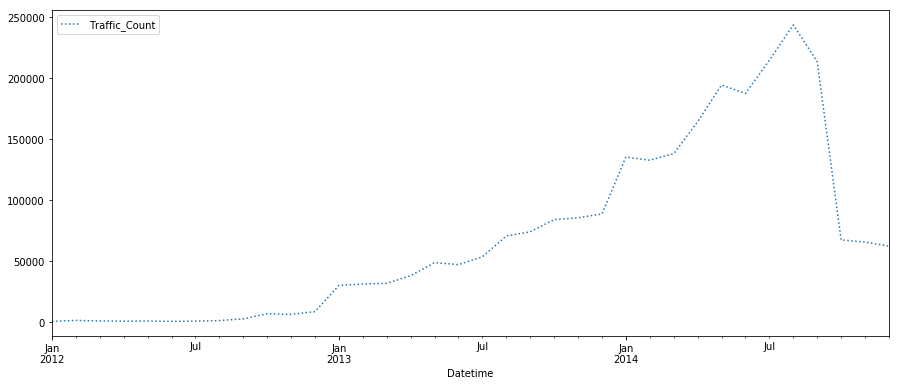

In [14]:
monthly_data.plot(style=[':', '-'],figsize=(15, 6))

# Modeling data with prophet

In [15]:
#monthly_data = monthly_data.reset_index()

In [16]:
#monthly_data.head()

In [17]:
#import fbprophet
#model = fbprophet.Prophet(changepoint_prior_scale=0.10)
#model.fit(monthly_data)

# Modeling with ARIMA

In [18]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [19]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

## Fit the model

In [20]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(monthly_data,
                                order=(1, 1, 2),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1866      0.318     -3.733      0.000      -1.810      -0.564
ma.L1          2.0181      0.736      2.740      0.006       0.575       3.462
ma.L2          1.0336      1.199      0.862      0.389      -1.317       3.384
ar.S.L12      -1.2486      2.710     -0.461      0.645      -6.560       4.062
sigma2       1.14e+09   1.79e-09   6.36e+17      0.000    1.14e+09    1.14e+09


## Validate the forecast

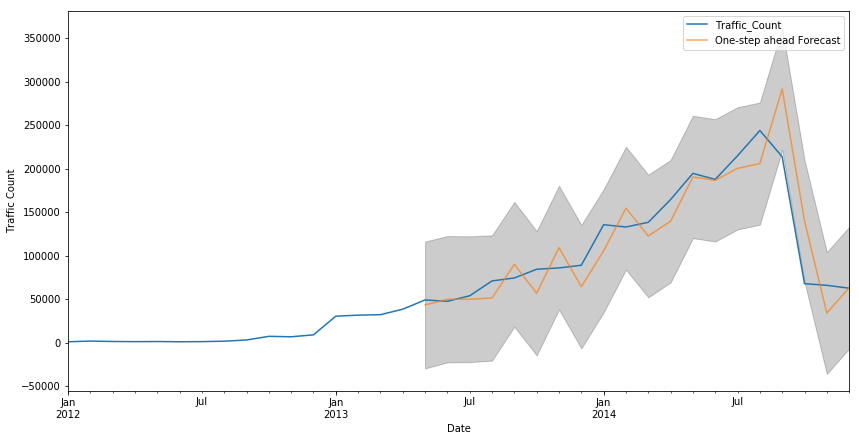

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2013-05-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = monthly_data['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic Count')
plt.legend()
plt.show()

# Future predictions for the next 7 months

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


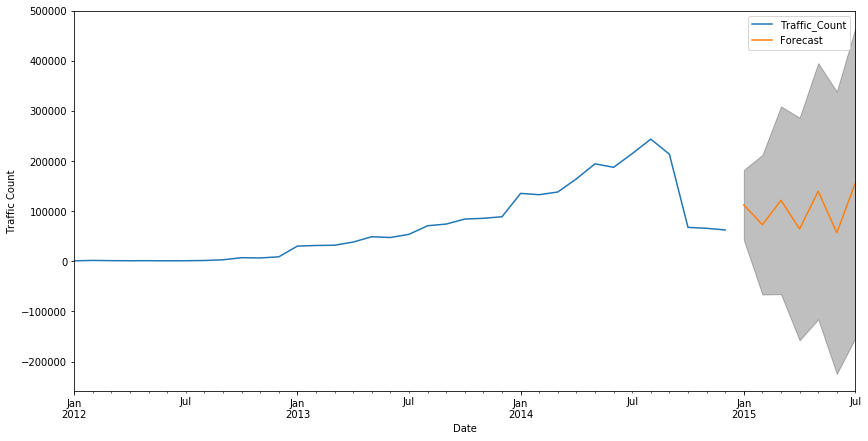

In [28]:
pred_uc = results.get_forecast(steps=7, alpha=0.05)
pred_ci = pred_uc.conf_int()
ax = monthly_data.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic Count')
plt.legend()
plt.show()

In [23]:
print(pred)

In [24]:
y_forecasted = pred.predicted_mean
y_forecasted

Datetime
2013-05-31     43191.554204
2013-06-30     49777.560365
2013-07-31     49791.404442
2013-08-31     51242.728714
2013-09-30     89870.338270
2013-10-31     56656.001307
2013-11-30    109050.102943
2013-12-31     64225.874394
2014-01-31    105332.978366
2014-02-28    154360.850466
2014-03-31    122412.567334
2014-04-30    139433.698188
2014-05-31    190322.691873
2014-06-30    186412.432892
2014-07-31    200158.131387
2014-08-31    205688.129149
2014-09-30    291391.349335
2014-10-31    139771.565759
2014-11-30     33964.452060
2014-12-31     62912.258873
Freq: M, dtype: float64

In [25]:
y_truth = monthly_data['2013-05-31':]
y_truth

,Traffic_Count
Datetime,
2013-05-31,48964
2013-06-30,47364
2013-07-31,53754
2013-08-31,70824
2013-09-30,74210
2013-10-31,84236
2013-11-30,85724
2013-12-31,88814
2014-01-31,135384
